In [49]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#To tune the model
from sklearn.model_selection import GridSearchCV

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score

from nltk.stem.snowball import SnowballStemmer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn import svm

In [2]:
# loading datasets

df = pd.read_csv("game_train.csv")
test = pd.read_csv("game_test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10494 entries, 0 to 10493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        10494 non-null  int64  
 1   title            10494 non-null  object 
 2   year             10386 non-null  float64
 3   user_review      10494 non-null  object 
 4   user_suggestion  10494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 410.0+ KB


In [4]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [5]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

In [6]:
df.head()

,review_id,title,year,user_review,user_suggestion
0,473,Sakura Clicker,2017.0,This has helped me through my stage 8 terminal...,1
1,22971,Crusaders of the Lost Idols,2017.0,Awesome idea. I support this game. I love that...,1
2,18225,RaceRoom Racing Experience,2014.0,"This game is just, such a♥♥♥♥♥♥take. The devel...",0
3,17132,Black Squad,2018.0,Early Access Reviewhere what i honesty think a...,1
4,8103,DCS World Steam Edition,2014.0,Very detailed sim and a joy to fly using a fli...,1


In [7]:
df.loc[1]['user_review']

"Awesome idea. I support this game. I love that it keeps making progress even when you arent playing, so you have this huge stash of gold when you come back sometimes. My only complaint is that the in-game achievements don't transfer to Steam achievements."

In [8]:
# \r and \n
df['user_review_Parsed_1'] = df['user_review'].str.replace("\r", " ")
df['user_review_Parsed_1'] = df['user_review_Parsed_1'].str.replace("\n", " ")
df['user_review_Parsed_1'] = df['user_review_Parsed_1'].str.replace("    ", " ")
df['user_review_Parsed_1'] = df['user_review_Parsed_1'].str.replace('"', '')

In [9]:
df['user_review_Parsed_2'] = df['user_review_Parsed_1'].str.lower()


In [10]:
punctuation_signs = list("?:!.,;")
df['user_review_Parsed_3'] = df['user_review_Parsed_2']

for punct_sign in punctuation_signs:
    df['user_review_Parsed_3'] = df['user_review_Parsed_3'].str.replace(punct_sign, '')

In [11]:
df['user_review_Parsed_4'] = df['user_review_Parsed_3'].str.replace("'s", "")


In [12]:
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

------------------------------------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isaac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isaac\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [14]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['user_review_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [15]:
df['user_review_Parsed_5'] = lemmatized_text_list


In [16]:
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isaac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [18]:
df['user_review_Parsed_6'] = df['user_review_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['user_review_Parsed_6'] = df['user_review_Parsed_6'].str.replace(regex_stopword, '')

In [19]:
df.loc[5]['user_review']

"Early Access ReviewI bought this game thanks to the sale, wanting to understand why Bless Online is so hated and if it deserves it and yes... it deserves it.Bad engine, bad graphic, bad optimization, orrible animation, no trace of action combat system (and pressing very fast 1 R R R is not action and there is no dodge), UI is some of the worst ever seen, auto-run is bugged and its pathfinding is very very unefficent, a nice character customization, npcs are all edgy and bad charaterized, story is without any trace of commitment by the developers, combo system is a lie (not a very combo system, just a short action bar and more spells come out when you cast one of yours from your mini action bar), thanks to the combo system you can't have all the cooldowns within reach and skill system is not hard, but it's unnecessarily complicated. In PvP it's a competition to whom press fasters his 1 R R combo.The only credit that i can give to Bless Online is that now i can consider even Metin2 a ve

In [20]:
df.loc[5]['user_review_Parsed_1']

"Early Access ReviewI bought this game thanks to the sale, wanting to understand why Bless Online is so hated and if it deserves it and yes... it deserves it.Bad engine, bad graphic, bad optimization, orrible animation, no trace of action combat system (and pressing very fast 1 R R R is not action and there is no dodge), UI is some of the worst ever seen, auto-run is bugged and its pathfinding is very very unefficent, a nice character customization, npcs are all edgy and bad charaterized, story is without any trace of commitment by the developers, combo system is a lie (not a very combo system, just a short action bar and more spells come out when you cast one of yours from your mini action bar), thanks to the combo system you can't have all the cooldowns within reach and skill system is not hard, but it's unnecessarily complicated. In PvP it's a competition to whom press fasters his 1 R R combo.The only credit that i can give to Bless Online is that now i can consider even Metin2 a ve

In [21]:
df.loc[5]['user_review_Parsed_2']

"early access reviewi bought this game thanks to the sale, wanting to understand why bless online is so hated and if it deserves it and yes... it deserves it.bad engine, bad graphic, bad optimization, orrible animation, no trace of action combat system (and pressing very fast 1 r r r is not action and there is no dodge), ui is some of the worst ever seen, auto-run is bugged and its pathfinding is very very unefficent, a nice character customization, npcs are all edgy and bad charaterized, story is without any trace of commitment by the developers, combo system is a lie (not a very combo system, just a short action bar and more spells come out when you cast one of yours from your mini action bar), thanks to the combo system you can't have all the cooldowns within reach and skill system is not hard, but it's unnecessarily complicated. in pvp it's a competition to whom press fasters his 1 r r combo.the only credit that i can give to bless online is that now i can consider even metin2 a ve

In [22]:
df.loc[5]['user_review_Parsed_3']

"early access reviewi bought this game thanks to the sale wanting to understand why bless online is so hated and if it deserves it and yes it deserves itbad engine bad graphic bad optimization orrible animation no trace of action combat system (and pressing very fast 1 r r r is not action and there is no dodge) ui is some of the worst ever seen auto-run is bugged and its pathfinding is very very unefficent a nice character customization npcs are all edgy and bad charaterized story is without any trace of commitment by the developers combo system is a lie (not a very combo system just a short action bar and more spells come out when you cast one of yours from your mini action bar) thanks to the combo system you can't have all the cooldowns within reach and skill system is not hard but it's unnecessarily complicated in pvp it's a competition to whom press fasters his 1 r r combothe only credit that i can give to bless online is that now i can consider even metin2 a very good mmorpg"

In [23]:
df.loc[5]['user_review_Parsed_4']

"early access reviewi bought this game thanks to the sale wanting to understand why bless online is so hated and if it deserves it and yes it deserves itbad engine bad graphic bad optimization orrible animation no trace of action combat system (and pressing very fast 1 r r r is not action and there is no dodge) ui is some of the worst ever seen auto-run is bugged and its pathfinding is very very unefficent a nice character customization npcs are all edgy and bad charaterized story is without any trace of commitment by the developers combo system is a lie (not a very combo system just a short action bar and more spells come out when you cast one of yours from your mini action bar) thanks to the combo system you can't have all the cooldowns within reach and skill system is not hard but it unnecessarily complicated in pvp it a competition to whom press fasters his 1 r r combothe only credit that i can give to bless online is that now i can consider even metin2 a very good mmorpg"

In [24]:
df.loc[5]['user_review_Parsed_5']

"early access reviewi buy this game thank to the sale want to understand why bless online be so hat and if it deserve it and yes it deserve itbad engine bad graphic bad optimization orrible animation no trace of action combat system (and press very fast 1 r r r be not action and there be no dodge) ui be some of the worst ever see auto-run be bug and its pathfinding be very very unefficent a nice character customization npcs be all edgy and bad charaterized story be without any trace of commitment by the developers combo system be a lie (not a very combo system just a short action bar and more spell come out when you cast one of yours from your mini action bar) thank to the combo system you can't have all the cooldowns within reach and skill system be not hard but it unnecessarily complicate in pvp it a competition to whom press fasters his 1 r r combothe only credit that i can give to bless online be that now i can consider even metin2 a very good mmorpg"

In [25]:
df.loc[5]['user_review_Parsed_6']

"early access reviewi buy  game thank   sale want  understand  bless online   hat    deserve   yes  deserve itbad engine bad graphic bad optimization orrible animation  trace  action combat system ( press  fast 1 r r r   action     dodge) ui     worst ever see auto-run  bug   pathfinding    unefficent  nice character customization npcs   edgy  bad charaterized story  without  trace  commitment   developers combo system   lie (   combo system   short action bar   spell come    cast one     mini action bar) thank   combo system  '    cooldowns within reach  skill system   hard   unnecessarily complicate  pvp   competition   press fasters  1 r r combothe  credit    give  bless online      consider even metin2   good mmorpg"

In [26]:
df.head(1)

,review_id,title,year,user_review,user_suggestion,user_review_Parsed_1,user_review_Parsed_2,user_review_Parsed_3,user_review_Parsed_4,user_review_Parsed_5,user_review_Parsed_6
0,473,Sakura Clicker,2017.0,This has helped me through my stage 8 terminal...,1,This has helped me through my stage 8 terminal...,this has helped me through my stage 8 terminal...,this has helped me through my stage 8 terminal...,this has helped me through my stage 8 terminal...,this have help me through my stage 8 terminal ...,help stage 8 terminal brain cancer fina...


In [27]:
list_columns = ["review_id", "title", "year", "user_review", "user_suggestion","user_review_Parsed_6"]
df = df[list_columns]

df = df.rename(columns={'user_review_Parsed_6': 'user_review_Parsed'})

In [28]:
df.head()


,review_id,title,year,user_review,user_suggestion,user_review_Parsed
0,473,Sakura Clicker,2017.0,This has helped me through my stage 8 terminal...,1,help stage 8 terminal brain cancer fina...
1,22971,Crusaders of the Lost Idols,2017.0,Awesome idea. I support this game. I love that...,1,awesome idea support game love keep make ...
2,18225,RaceRoom Racing Experience,2014.0,"This game is just, such a♥♥♥♥♥♥take. The devel...",0,game ♥♥♥♥♥♥take developers want money ...
3,17132,Black Squad,2018.0,Early Access Reviewhere what i honesty think a...,1,early access reviewhere honesty think game...
4,8103,DCS World Steam Edition,2014.0,Very detailed sim and a joy to fly using a fli...,1,detail sim joy fly use flightstick big d...


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df['user_review_Parsed'], 
                                                    df['user_suggestion'], 
                                                    test_size=0.3, 
                                                    random_state=8)

In [30]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(7345, 300)
(3149, 300)


In [31]:
X_train.head()

3940      like  dumbed  wot game  play like pee wee so...
396      game give  instructions    scar  2 deer   ' f...
3408    extremely toxic community  way hi-rez   remova...
1496    neverwinter    fun accessible mmorpg   combat ...
8093      game definetly   silly  fun feel    many    ...
Name: user_review_Parsed, dtype: object

In [33]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [34]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [36]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=8, scoring='accuracy', verbose=1)

In [37]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
0.7527589514549978


In [38]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [800]},
             scoring='accuracy', verbose=1)

In [39]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.7568756875687569


In [41]:
best_rfc = grid_search.best_estimator_
best_rfc


RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=800, random_state=8)

In [42]:
best_rfc.fit(features_train, labels_train)


RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=800, random_state=8)

In [43]:
rfc_pred = best_rfc.predict(features_test)


In [44]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))


The training accuracy is: 
0.9737236215112322


              precision    recall  f1-score   support

           0       0.61      0.75      0.68      1118
           1       0.84      0.74      0.79      2031

    accuracy                           0.74      3149
   macro avg       0.73      0.75      0.73      3149
weighted avg       0.76      0.74      0.75      3149



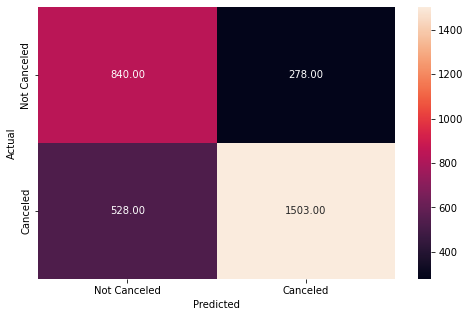

In [45]:
metrics_score(rfc_pred,labels_test)

In [50]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [51]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [52]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=8), n_iter=50,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   random_state=8, scoring='accuracy', verbose=1)

In [53]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.7568756875687569


In [55]:
best_svc = grid_search.best_estimator_
best_svc

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=800, random_state=8)

In [56]:
best_svc.fit(features_train, labels_train)


RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=800, random_state=8)

In [57]:
svc_pred = best_svc.predict(features_test)


In [58]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_svc.predict(features_train)))


The training accuracy is: 
0.9737236215112322


              precision    recall  f1-score   support

           0       0.61      0.75      0.68      1118
           1       0.84      0.74      0.79      2031

    accuracy                           0.74      3149
   macro avg       0.73      0.75      0.73      3149
weighted avg       0.76      0.74      0.75      3149



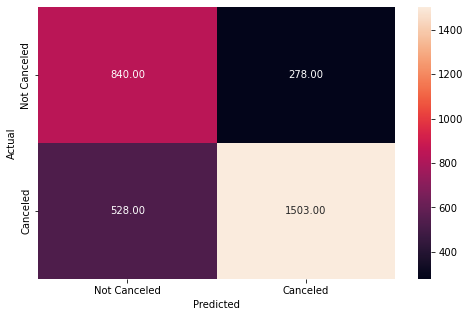

In [59]:
metrics_score(svc_pred,labels_test)

In [60]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [61]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             scoring='accuracy', verbose=1)

In [62]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 142}

The mean accuracy of a model with these hyperparameters is:
0.7270352035203521


In [63]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy', verbose=1)

In [64]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
0.5926842684268426


In [65]:
best_knnc = grid_search.best_estimator_

In [66]:
best_knnc

KNeighborsClassifier(n_neighbors=1)

In [67]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
knnc_pred = best_knnc.predict(features_test)

              precision    recall  f1-score   support

           0       0.91      0.46      0.61      2729
           1       0.17      0.72      0.28       420

    accuracy                           0.49      3149
   macro avg       0.54      0.59      0.44      3149
weighted avg       0.82      0.49      0.57      3149



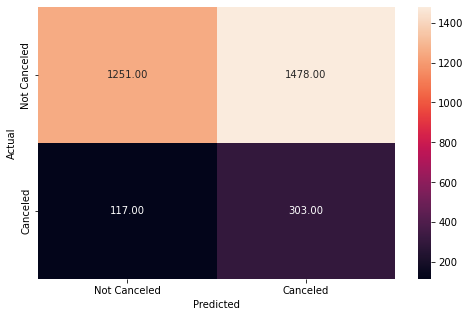

In [69]:
metrics_score(knnc_pred,labels_test)